# Modeling And Machine Learning.

In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_pickle("../data/train_data_wrangle.plk")
test = pd.read_pickle("../data/test_data_wrangle.plk")

In [3]:
print(train['class'].unique(), ' ', test['class'].unique())

[3 2 1]   [2 3 1]


### Applying machine learning techniques.

In [4]:
X_train = train.drop('class',axis=1)
y_train = train['class']

X_test = test.drop('class',axis=1)
y_test = test['class']

In [5]:
!pip install scikit-plot
!pip install yellowbrick
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\rahul\anaconda3\lib\site-packages (0.3.3)
Requirement not upgraded as not directly required: numpy in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (1.13.3)
Requirement not upgraded as not directly required: scikit-learn in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)
Requirement not upgraded as not directly required: scipy in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)


In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

def classifier_scores(clf, phase, x, y, to_print=False, class_print=False, func=accuracy_score):
    """A function used for fitting the classifier, predicting and returning prediction scores."""
    if phase == 'train':
        clf.fit(x, y)
    clf_predict_scr = func(clf.predict(x), y)
    if to_print:
        print('Accuracy score of classifier on','train' if phase=='train' else phase,'is',clf_predict_scr)
    if class_print:
         print(clf)
    return clf_predict_scr

def print_stars(count):
    """Function to print starts"""
    print(count * '*')

def print_classification_report(clf, X, y, phase='test'):
    """function prints out classification report"""
    print_stars(100)
    print('Training' if phase=='train' else 'Test','classification report.\n',classification_report(y, clf.predict(X)))
    print_stars(100)

def print_confusion_matrix(clf, X, y, phase='test'):
    """function prints out confusion matrix"""
    print_stars(100)
    print('Training' if phase=='train' else 'Test','confusion matrix.\n',confusion_matrix(y, clf.predict(X)))
    print_stars(100)

"""function plots confusion matrix"""
def show_confusion_matrix(clf, X, y, phase='test'):
    print('Training' if phase=='train' else 'Test','confusion matrix.')
    skplt.metrics.plot_confusion_matrix(y, clf.predict(X), normalize=False)

"""function to plot classification report, can also plot confusion matrix."""
def show_report(clf, X, y, type_of='classification', phase='test'):
    if type_of == 'classification':
        print('Training' if phase=='train' else 'Test','classification report.')
        report_type = ClassificationReport(clf, cmap='Blues')
    else:        
        print('Training' if phase=='train' else 'Test','confusion matrix.')
        report_type = ConfusionMatrix(clf, cmap='Blues')
    if phase == 'train':
        report_type.fit(X, y)
    report_type.score(X, y)
    report_type.poof()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

train_score = classifier_scores(logreg, 'train', X_train, y_train, True)
test_score = classifier_scores(logreg, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 0.926033934252
Accuracy score of classifier on test is 0.928529754959


**Tuning parameters for logistic regression.**

In [8]:
#the grid of parameters to search over
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [9]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':Cs}
logreg = LogisticRegression()

gridSearchClf = GridSearchCV(logreg, parameters)
classifier_scores(gridSearchClf, 'train', X_train, y_train)

c = gridSearchClf.best_params_['C']
print('C value:',c)
logreg_C = LogisticRegression(C = c)

train_score = classifier_scores(logreg_C, 'train', X_train, y_train, True)
test_score = classifier_scores(logreg_C, 'test', X_test, y_test, True)

C value: 1000
Accuracy score of classifier on train is 0.952279957582
Accuracy score of classifier on test is 0.946616102684


Training classification report.


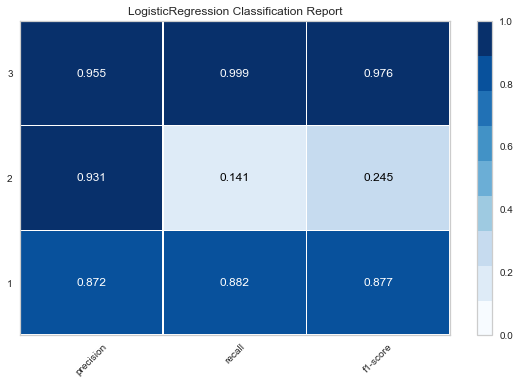

Test classification report.


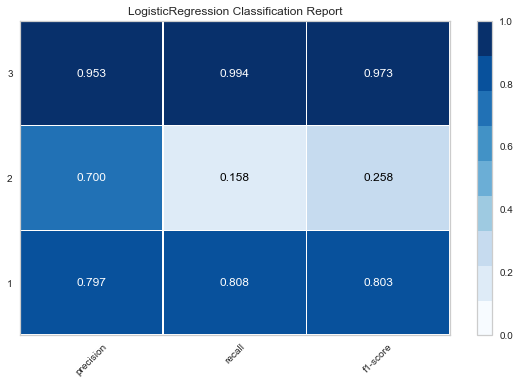

In [10]:
g1 = show_report(logreg_C, X_train, y_train, 'classification', 'train')
g2 = show_report(logreg_C, X_test, y_test, 'classification', 'test')

Training confusion matrix.
Test confusion matrix.


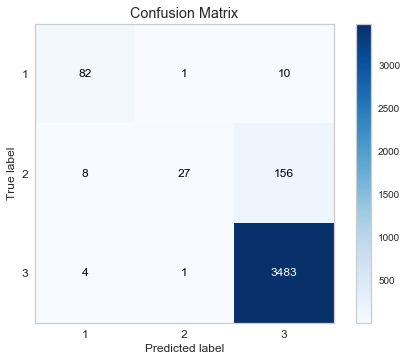

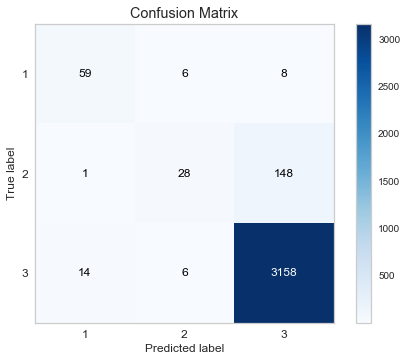

In [12]:
show_confusion_matrix(logreg_C, X_train, y_train, 'train')
show_confusion_matrix(logreg_C, X_test, y_test, 'test')

C of 1000 did a better prediction than default.

But when it comes to prediction of **class 2**, it did not predict well.

Perform cross validation.

10-fold cross validation average accuracy on train set is 0.95147
10-fold cross validation average accuracy on test set is 0.94195
Training classification report.


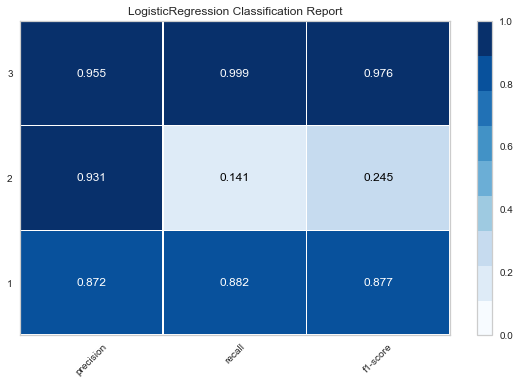

Test classification report.


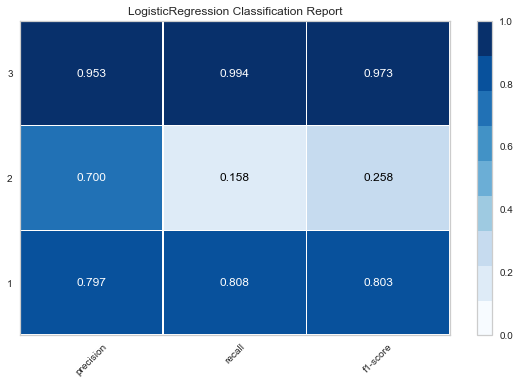

In [13]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, random_state=42)

logregmodelCV = LogisticRegression(C=c)
logregmodelCV.fit(X_train, y_train)
scorelogregCV = cross_val_score(logregmodelCV, X_train, y_train, cv=kfold)
testscorelogregCV = cross_val_score(logregmodelCV, X_test, y_test, cv=kfold)

print('10-fold cross validation average accuracy on train set is {:.5f}'.format(scorelogregCV.mean()))
print('10-fold cross validation average accuracy on test set is {:.5f}'.format(testscorelogregCV.mean()))

show_report(logregmodelCV, X_train, y_train, 'classification', 'train')
show_report(logregmodelCV, X_test, y_test, 'classification', 'test')

Training confusion matrix.
Test confusion matrix.


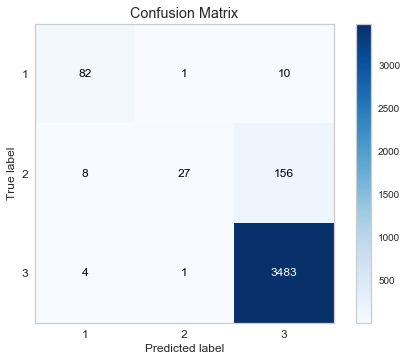

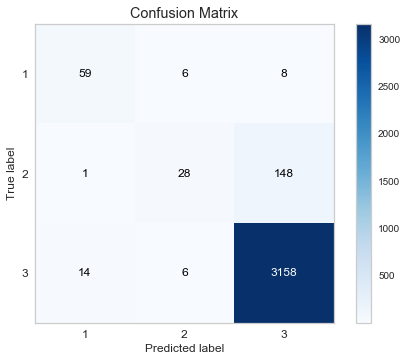

In [14]:
show_confusion_matrix(logregmodelCV, X_train, y_train, 'train')
show_confusion_matrix(logregmodelCV, X_test, y_test, 'test')

After cross_validation compared with logreg_C accuracy was a bit lower, will stick with logreg_C.

Applying regularizations for logreg_C

L2 (default) regularization.
Training classification report.


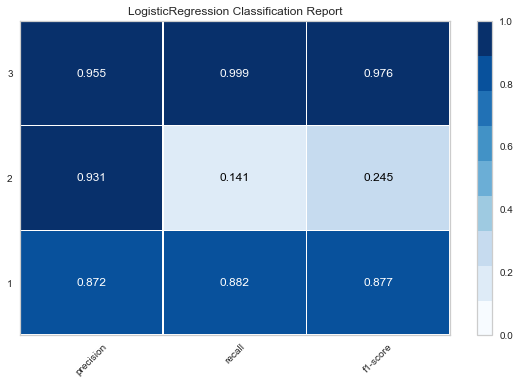

Test classification report.


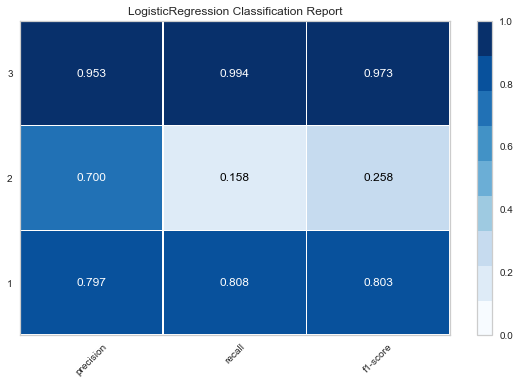

In [15]:
print('L2 (default) regularization.')
show_report(logreg_C, X_train, y_train, 'classification', 'train')
show_report(logreg_C, X_test, y_test, 'classification', 'test')

Training confusion matrix.
Test confusion matrix.


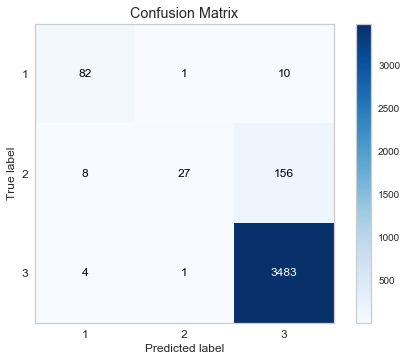

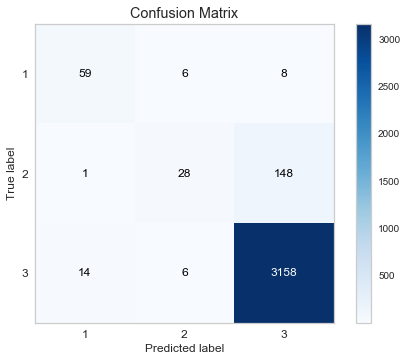

In [16]:
show_confusion_matrix(logreg_C, X_train, y_train, 'train')
show_confusion_matrix(logreg_C, X_test, y_test, 'test')

In [17]:
logreg_C_l1 = LogisticRegression(penalty='l1', C=c)

train_score = classifier_scores(logreg_C_l1, 'train', X_train, y_train, True)
test_score = classifier_scores(logreg_C_l1, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 0.957051961824
Accuracy score of classifier on test is 0.949533255543


L1 regularization
Training classification report.


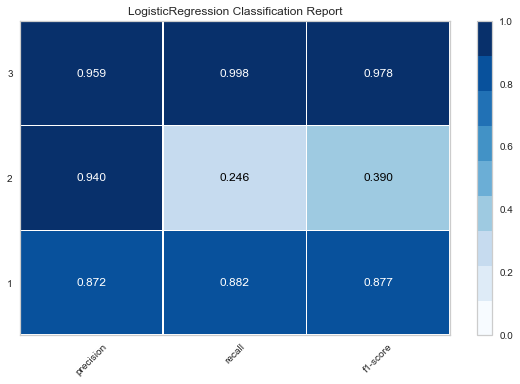

Test classification report.


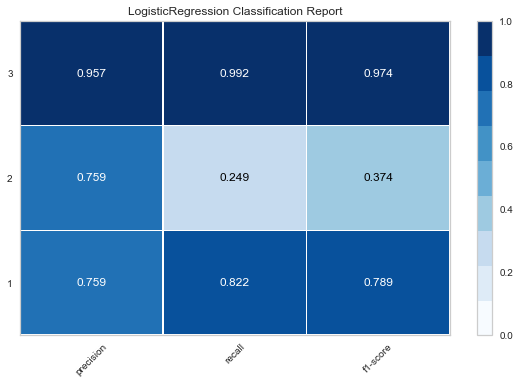

Training confusion matrix.
Test confusion matrix.


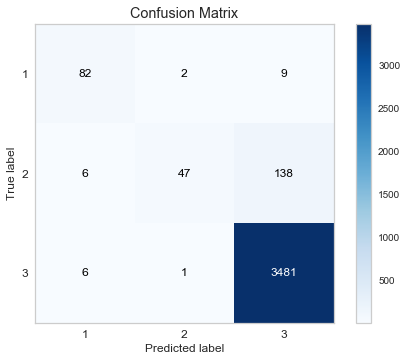

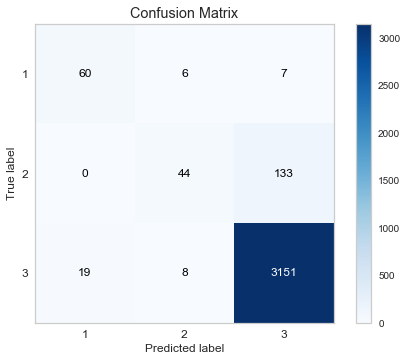

In [18]:
print('L1 regularization')
show_report(logreg_C_l1, X_train, y_train, 'classification', 'train')
show_report(logreg_C_l1, X_test, y_test, 'classification', 'test')
show_confusion_matrix(logreg_C_l1, X_train, y_train, 'train')
show_confusion_matrix(logreg_C_l1, X_test, y_test, 'test')

With **L2, L1** regularization(s) the model performed bad in predicting the **class 2** in both training and testing phases.

Logistic regression was not a good model here (especially in predicting class 2).

In [19]:
# write notes about base model.

## From the observation we see that we have an unbalanced data set, so will be applying different techniques to get better classification.

In [20]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', class_weight={1: 10})

train_score = classifier_scores(svm_clf, 'train', X_train, y_train, True)
test_score = classifier_scores(svm_clf, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 0.942735949099
Accuracy score of classifier on test is 0.936406067678


Training classification report.


C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


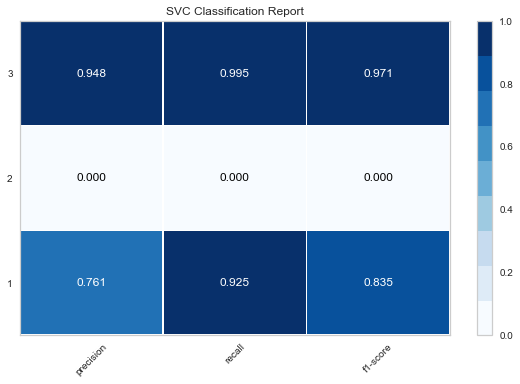

Test classification report.


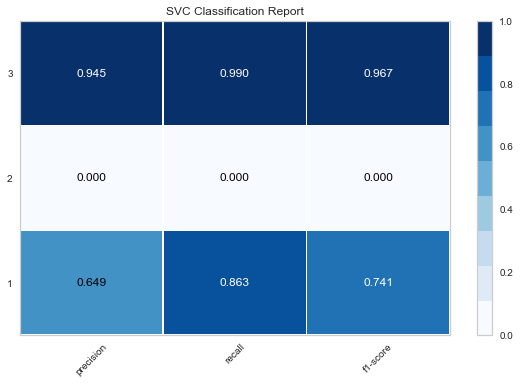

Training confusion matrix.
Test confusion matrix.


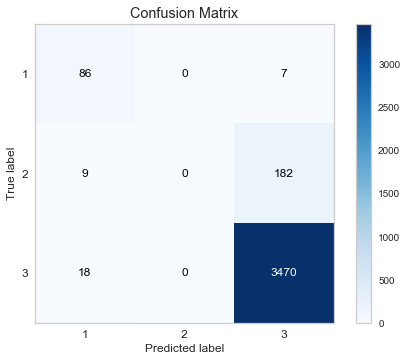

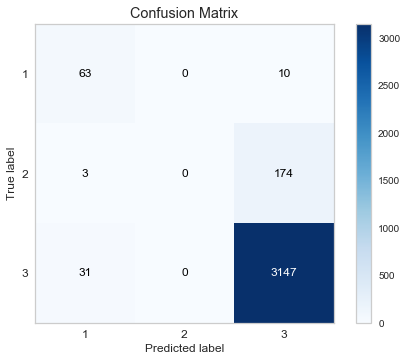

In [21]:
show_report(svm_clf, X_train, y_train, 'classification', 'train')
show_report(svm_clf, X_test, y_test, 'classification', 'test')
show_confusion_matrix(svm_clf, X_train, y_train, 'train')
show_confusion_matrix(svm_clf, X_test, y_test, 'test')

Did a bad job in predicting **class 2**

Will be picking different ML techniques to get a better estimate of **class 2**.

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

train_score = classifier_scores(rf_clf, 'train', X_train, y_train, True)
test_score = classifier_scores(rf_clf, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.991831971995


Training classification report.


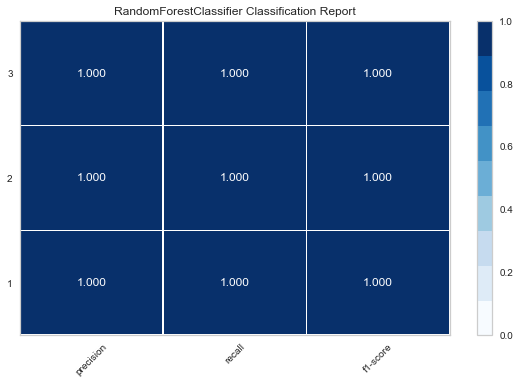

Test classification report.


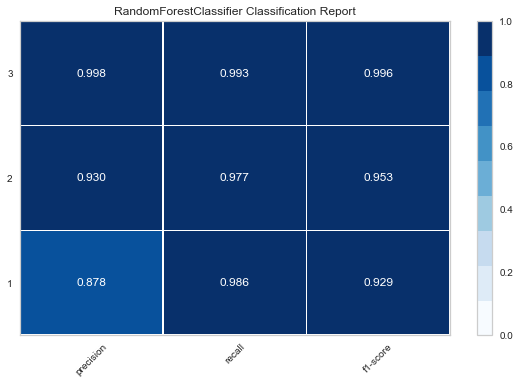

Training confusion matrix.
Test confusion matrix.


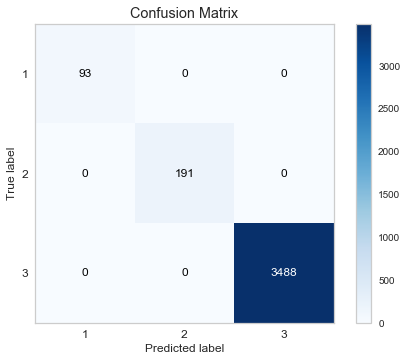

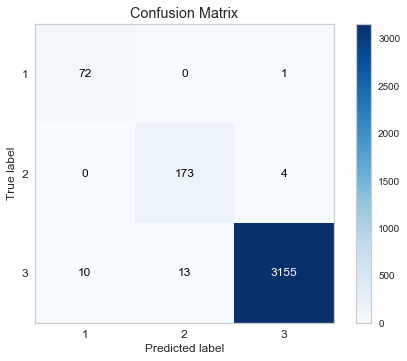

In [23]:
show_report(rf_clf, X_train, y_train, 'classification', 'train')
show_report(rf_clf, X_test, y_test, 'classification', 'test')
show_confusion_matrix(rf_clf, X_train, y_train, 'train')
show_confusion_matrix(rf_clf, X_test, y_test, 'test')

In [24]:
from imblearn.over_sampling import SMOTE # (Synthetic Minority Oversampling Technique)

oversampler=SMOTE(random_state=0)
os_features, os_labels = oversampler.fit_sample(X_train,y_train)

rf_clf_os = RandomForestClassifier(random_state=42)

train_score = classifier_scores(rf_clf_os, 'train', os_features, os_labels, True)
test_score = classifier_scores(rf_clf_os, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.992415402567


Training classification report.


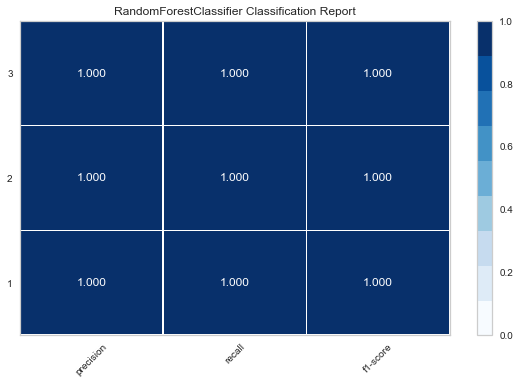

Test classification report.


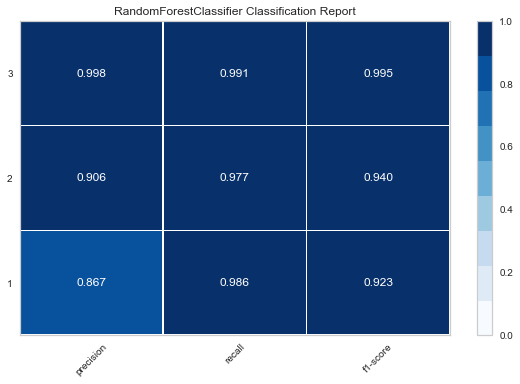

Training confusion matrix.
Test confusion matrix.


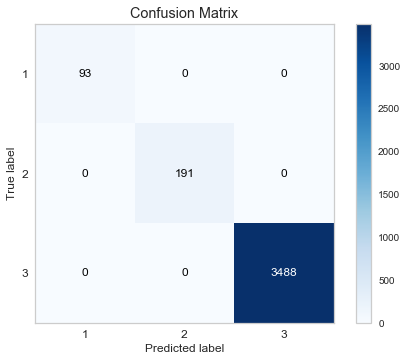

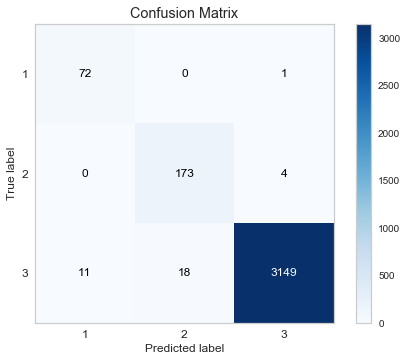

In [25]:
show_report(rf_clf_os, X_train, y_train, 'classification', 'train')
show_report(rf_clf_os, X_test, y_test, 'classification', 'test')
show_confusion_matrix(rf_clf_os, X_train, y_train, 'train')
show_confusion_matrix(rf_clf_os, X_test, y_test, 'test')

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier(random_state=0)

train_score = classifier_scores(dtree_clf, 'train', X_train, y_train)
test_score = classifier_scores(dtree_clf, 'test', X_test, y_test)

Training classification report.


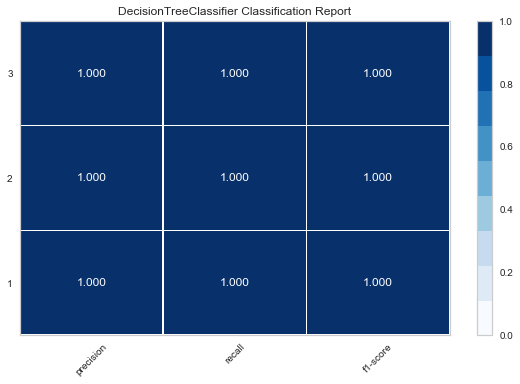

Test classification report.


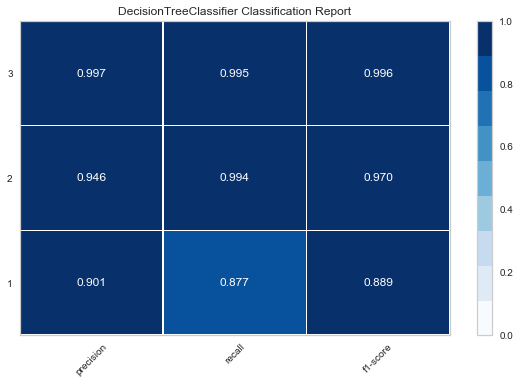

Training confusion matrix.
Test confusion matrix.


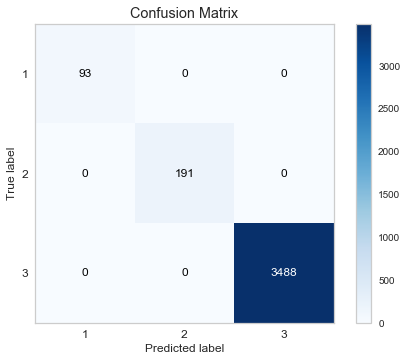

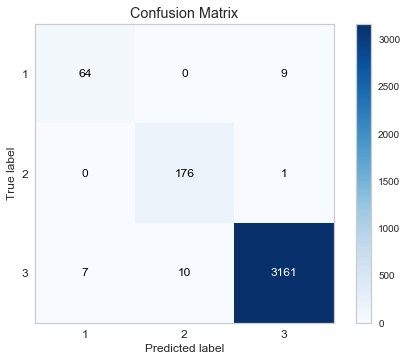

In [27]:
show_report(dtree_clf, X_train, y_train, 'classification', 'train')
show_report(dtree_clf, X_test, y_test, 'classification', 'test')
show_confusion_matrix(dtree_clf, X_train, y_train, 'train')
show_confusion_matrix(dtree_clf, X_test, y_test, 'test')

SMOTE with RandomForestClassifier performed better among SVM, RandomForestClassifier, DecisionTreeClassifier.

In [28]:
# more documentation to be added.

## Plot a ROC curve

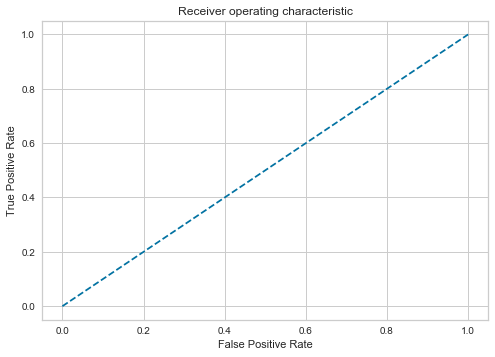

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure()
plt.plot([0, 1], [0, 1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()